In [1]:
# About
# torch.utils.data.DataLoader
# torch.utils.data.Dataset

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
train_data = datasets.FashionMNIST(
    root="",
    train=True,
    download=True,
)

test_data = datasets.FashionMNIST(
    root="",
    train=False,
    download=True,
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/raw



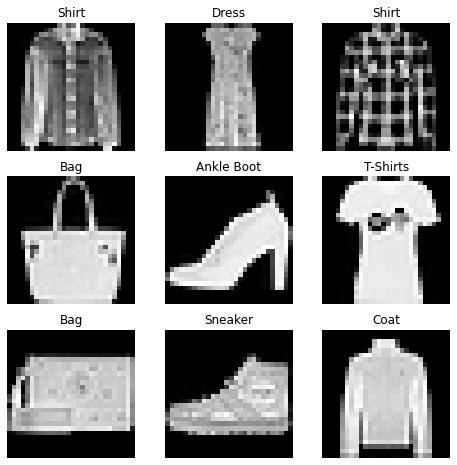

In [4]:
labels_maps = {
    0: "T-Shirts",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_index = torch.randint(len(train_data), size=(1, )).item()
  img, label = train_data[sample_index]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_maps[label])
  plt.axis("off")
  plt.imshow(img, cmap="gray")
plt.show()

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

train_features, train_labels = next(iter(train_dataloader))
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print("Label: {}".format(label))

TypeError: ignored

In [7]:
print(img.shape)
print(img[0, 0].item())
print(img[14, 14].item())

AttributeError: ignored

In [8]:
from torchvision.io import read_image

In [9]:
%cd ..

/


In [10]:
img_path = "/content/drive/MyDrive/ml-data/flowers/daisy/10172567486_2748826a8b.jpg"

In [11]:
img = read_image(img_path)

In [12]:
img.shape

torch.Size([3, 333, 500])

In [13]:
print(img.shape)
img_numpy = img.numpy() 

torch.Size([3, 333, 500])


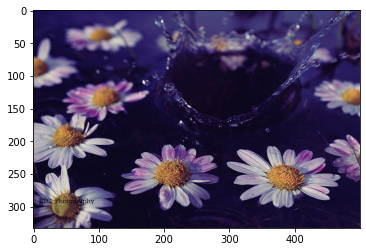

In [14]:
plt.imshow(img_numpy.transpose(1,2,0))

In [15]:
from torchvision.transforms import ToTensor

In [16]:
transformer = ToTensor()

In [17]:
img2 = transformer(img_numpy)

In [18]:
img2.shape

torch.Size([500, 3, 333])

In [19]:
img3 = img2.permute((2,0,1))

In [20]:
img3.shape

torch.Size([333, 500, 3])

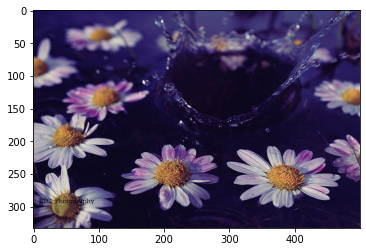

In [21]:
plt.imshow(img3)

In [22]:
img3.type()

'torch.FloatTensor'

In [57]:
import os
import pandas as pd
from torchvision.io import read_image

class FlowerDataset(Dataset):
  def __init__(self, annotations_file, img_dir,\
               transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file, names=['file_names', 'label'])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)
  
  def __getitem__(self, idx):
    print(self.img_dir, self.img_labels.iloc[idx, 0])
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    print("img_path: {}".format(img_path))
    image = read_image(img_path)
    print(type(image))
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label


In [69]:
annot_file = "/content/drive/MyDrive/ml-data/flowers/annotations_file.csv"
img_dir = "/content/drive/MyDrive/ml-data/flowers"
fd = FlowerDataset(annot_file, img_dir, None, None)

In [74]:
fd_loader = DataLoader(fd, batch_size=1, shuffle=True)

In [75]:
train_features, train_label = next(iter(fd_loader))

/content/drive/MyDrive/ml-data/flowers sunflower/1008566138_6927679c8a.jpg
img_path: /content/drive/MyDrive/ml-data/flowers/sunflower/1008566138_6927679c8a.jpg
<class 'torch.Tensor'>


In [76]:
target = train_features[0]
print(target.shape)
print(target.min())
print(target.max())

torch.Size([3, 330, 500])
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)


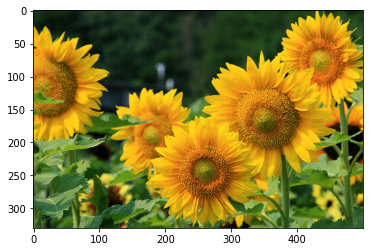

In [77]:
plt.imshow(target.permute(1,2,0))

In [82]:
import torchvision.transforms as transforms

tf = transforms.ToPILImage()
img_t = tf(target)

In [90]:
target_dd = ToTensor()(img_t)
print(target_dd.dtype)
print(target_dd.min())
print(target_dd.max())

torch.float32
tensor(0.)
tensor(1.)


In [91]:
for data, label in fd_loader:
  print(data, label)

/content/drive/MyDrive/ml-data/flowers sunflower/1008566138_6927679c8a.jpg
img_path: /content/drive/MyDrive/ml-data/flowers/sunflower/1008566138_6927679c8a.jpg
<class 'torch.Tensor'>
tensor([[[[ 34,  33,  33,  ...,  16,  15,  15],
          [ 31,  30,  31,  ...,  25,  24,  23],
          [ 29,  28,  28,  ...,  25,  23,  22],
          ...,
          [ 91,  98,  95,  ...,  47,  46,  47],
          [ 87,  98,  90,  ...,  43,  44,  49],
          [ 87, 102, 100,  ...,  44,  47,  50]],

         [[ 49,  49,  51,  ...,  42,  41,  41],
          [ 48,  47,  49,  ...,  43,  42,  41],
          [ 46,  45,  48,  ...,  48,  48,  47],
          ...,
          [140, 142, 123,  ...,  96,  95,  94],
          [141, 141, 123,  ...,  97,  96,  92],
          [141, 145, 133,  ...,  96,  94,  91]],

         [[ 42,  39,  39,  ...,  13,  12,  12],
          [ 40,  37,  37,  ...,  17,  16,  15],
          [ 38,  35,  36,  ...,  19,  18,  17],
          ...,
          [ 31,  91,  82,  ...,  49,  48,  48],
